<a href="https://colab.research.google.com/github/poojashresthacode/23-Homework6G5/blob/expo_function/Task_1_expo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


def simpson(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite Simpson's rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Simpson's_rule
    """
    h = (b - a) / n
    i = np.arange(0,n)

    s = f(a) + f(b)
    s += 4 * np.sum( f( a + i[1::2] * h ) )
    s += 2 * np.sum( f( a + i[2:-1:2] * h ) )

    return s * h / 3

def trapezoid(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite trapezoidal rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Trapezoidal_rule
    """
    h = (b - a) / n
    s = f(a) + f(b)
    i = np.arange(0,n)
    s += 2 * np.sum( f(a + i[1:] * h) )
    return s * h / 2


def adaptive_trapezoid(f, a, b, acc, output=False):
    """
    Uses the adaptive trapezoidal method to compute the definite integral
    of f from a to b to desired accuracy acc.
    """
    old_s = np.inf
    h = b - a
    n = 1
    s = (f(a) + f(b)) * 0.5
    if output == True :
        print ("N = " + str(n+1) + ",  Integral = " + str( h*s ))
    while abs(h * (old_s - s*0.5)) > acc :
        old_s = s
        for i in np.arange(n) :
            s += f(a + (i + 0.5) * h)
        n *= 2.
        h *= 0.5
        if output == True :
            print ("N = " + str(n) + ",  Integral = " + str( h*s ))
    return h * s

In [2]:
%%writefile calculus.py

Writing calculus.py


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from calculus import *

In [10]:

# Define the function exp(-1/x)
def exp_func(x):
    # Avoid zero
    epsilon = 1e-10
    return np.where(np.abs(x) < epsilon, np.nan, np.exp(-1 / x))

# Define integration bounds and the number of subintervals
a_exp = 1e-10
b_exp = 50
n_exp = 10

# Calculate and print results using the trapezoidal rule
ans_exp_trapezoid = trapezoid(exp_func, a_exp, b_exp, n_exp)
print('Trapezoidal rule result for exp(-1/x):', ans_exp_trapezoid)

# Calculate and print results using Simpson's rule
ans_exp_simpson = simpson(exp_func, a_exp, b_exp, n_exp)
print('Simpson\'s rule result for exp(-1/x):', ans_exp_simpson)

# Calculate and print the result using the adaptive trapezoidal rule for exp(-1/x)
ans_adaptive_trapezoid_exp = adaptive_trapezoid(exp_func, a_exp, b_exp, 0.0001, output=True)
print('Adaptive trapezoidal rule result for exp(-1/x):', ans_adaptive_trapezoid_exp)


Trapezoidal rule result for exp(-1/x): 44.767875582331264
Simpson's rule result for exp(-1/x): 45.394860137465905
N = 2,  Integral = 24.50496683261987
N = 2.0,  Integral = 36.2722193950719
N = 4.0,  Integral = 41.84613589424154
N = 8.0,  Integral = 44.33629552340518
N = 16.0,  Integral = 45.32211379318896
N = 32.0,  Integral = 45.62074101600314
N = 64.0,  Integral = 45.66332231905843
N = 128.0,  Integral = 45.656444665639235
N = 256.0,  Integral = 45.65514251840915
N = 512.0,  Integral = 45.6552280711973
Adaptive trapezoidal rule result for exp(-1/x): 45.6552280711973


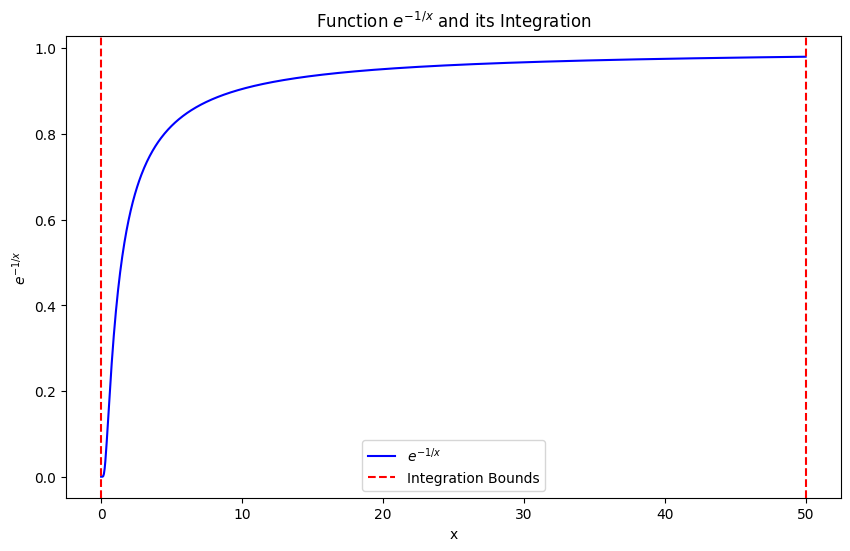

In [8]:
# Plot the function
x_values = np.linspace(a_exp, b_exp, 1000)
y_values = exp_func(x_values)

plt.figure(figsize=(10, 6))

# Plot the function
plt.plot(x_values, y_values, label=r'$e^{-1/x}$', color='blue')

# Highlight the integration area
plt.axvline(a_exp, color='red', linestyle='--', label='Integration Bounds')
plt.axvline(b_exp, color='red', linestyle='--')

# Show the legend
plt.legend()

# Set plot labels and title
plt.xlabel('x')
plt.ylabel(r'$e^{-1/x}$')
plt.title('Function $e^{-1/x}$ and its Integration')

# Show the plot
plt.show()

In [9]:

def calculate_accuracy(true_value, computed_value):
    """
    Calculates the accuracy in terms of correct digits.
    """
    true_str = "{:.10f}".format(true_value)
    computed_str = "{:.10f}".format(computed_value)

    num_correct_digits = sum(a == b for a, b in zip(true_str, computed_str))
    return num_correct_digits

def compare_integration_methods(true_value, method_results):
    """
    Compares the accuracies and efficiencies of integration methods.
    """
    print("Integration Method\tAccuracy (Correct Digits)\tEfficiency (Number of Steps)")
    print("-" * 70)

    for method, (result, steps) in method_results.items():
        accuracy = calculate_accuracy(true_value, result)
        print(f"{method}\t\t\t{accuracy}\t\t\t\t{steps}")

# Define the true integral value (we need to set this based on your expectations)
true_integral_value = 45.6552294298  # Update this with the actual true value

# Results obtained from integration methods
method_results = {
    "Trapezoidal Rule": (44.767875582331264, 10),
    "Simpson's Rule": (45.394860137465905, 10),
    "Adaptive Trapezoidal Rule": (45.6552280711973, 512)
}

# Compare accuracies and efficiencies
compare_integration_methods(true_integral_value, method_results)


Integration Method	Accuracy (Correct Digits)	Efficiency (Number of Steps)
----------------------------------------------------------------------
Trapezoidal Rule			2				10
Simpson's Rule			3				10
Adaptive Trapezoidal Rule			8				512
